![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

**Predicción de gasto por deterioro en las sociedades fiduciarias**

**Métodos estadísticos para analítica de datos** <br>

Docente: Luis Andrés Campos Maldonado <br>
Facultad de Ingeniería y Ciencias Básicas <br>
Universidad Central <br>

__GRUPO 4__ <br>
- Daniel Mauricio Cardenas<br>
- Luisa Fernanda Rodriguez

In [1]:
# Cargar el archivo utils.py, este archivo contiene las librerias necesarias y algunos modulos a utilizar en el proceso

from utils import *

In [2]:
file_path = 'https://raw.githubusercontent.com/LordOnion88/MAD/refs/heads/main/Series%20de%20Tiempo/Proyecto/base%20ajustada.csv'
df = pd.read_csv(file_path)
df

,FECHA_CORTE,Ingresos,Deterioro
0,31/01/2016,12556235614,456212289
1,29/02/2016,11948803346,426440399
2,31/03/2016,12124055034,507291741
3,30/04/2016,12268361877,132621564
4,31/05/2016,22885166819,488187217
...,...,...,...
99,30/04/2024,27195720063,11441164891
100,31/05/2024,23126998775,86331878
101,30/06/2024,29758712102,95378649
102,31/07/2024,36122438899,113647065


In [3]:
#Validar el tipo de datos de cada columna y si tiene datos nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FECHA_CORTE  104 non-null    object
 1   Ingresos     104 non-null    int64 
 2   Deterioro    104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [4]:
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'])

In [5]:
# Ajustar el df para que sea una serie de tiempo

df.index = df['FECHA_CORTE'] # Definir la columna fecha como index
df.drop(columns=['FECHA_CORTE'],inplace=True) # Eliminar la columna fecha
df

,Ingresos,Deterioro
FECHA_CORTE,,
2016-01-31,12556235614,456212289
2016-02-29,11948803346,426440399
2016-03-31,12124055034,507291741
2016-04-30,12268361877,132621564
2016-05-31,22885166819,488187217
...,...,...
2024-04-30,27195720063,11441164891
2024-05-31,23126998775,86331878
2024-06-30,29758712102,95378649


In [6]:
df_gasto = df.copy()
df_gasto = df_gasto.drop(['Ingresos'], axis = 1)
df_gasto

,Deterioro
FECHA_CORTE,
2016-01-31,456212289
2016-02-29,426440399
2016-03-31,507291741
2016-04-30,132621564
2016-05-31,488187217
...,...
2024-04-30,11441164891
2024-05-31,86331878
2024-06-30,95378649


# Entendimiento de los datos

- Graficar la serie de tiempo original
- Descomponer la serie de tiempo original

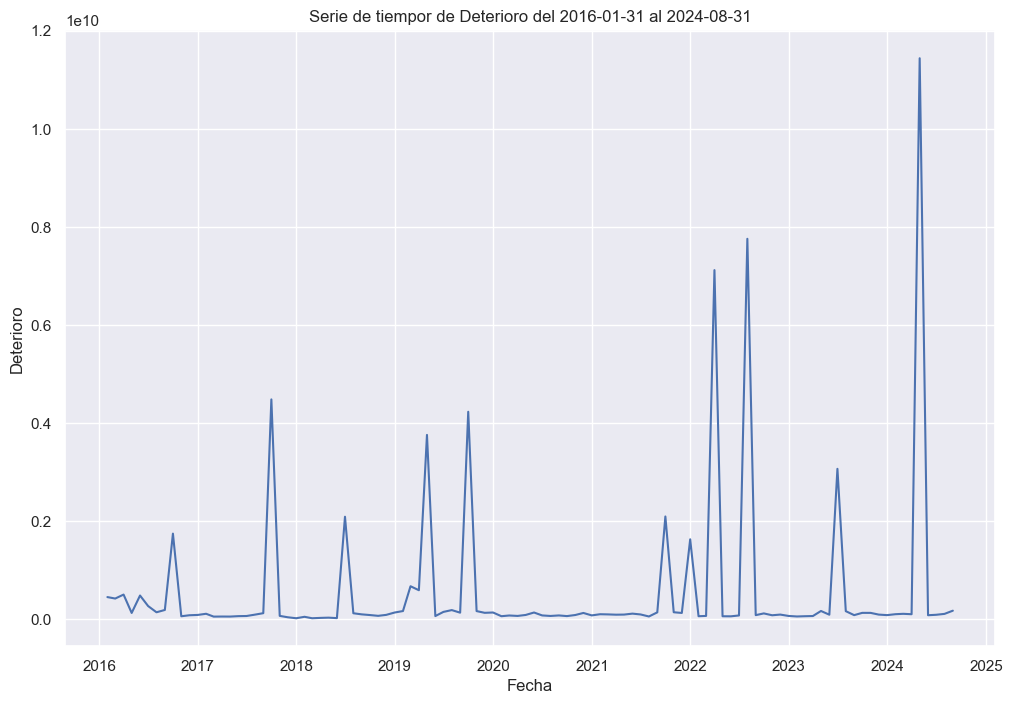

In [7]:
serie_de_tiempo(df_gasto,'Deterioro')

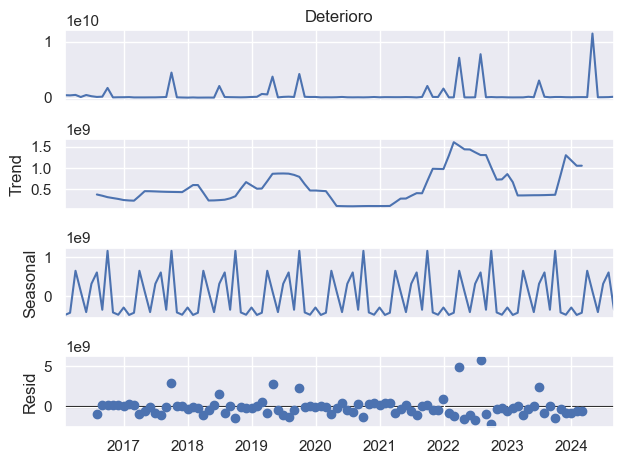

In [8]:
Serie_decompuesta = seasonal_decompose (df_gasto['Deterioro'],model = 'additive', period= 12)
grafico1 = Serie_decompuesta.plot()

In [9]:
df_gasto['log_Deterioro'] = np.log10(df_gasto['Deterioro'])
df_gasto.describe()

,Deterioro,log_Deterioro
count,1.040000e+02,104.000000
mean,5.898848e+08,8.175024
std,1.662141e+09,0.550004
min,2.466401e+07,7.392064
25%,7.217045e+07,7.858359
50%,1.008496e+08,8.003640
75%,1.487325e+08,8.172312
max,1.144116e+10,10.058470


In [10]:
adf_test = adfuller(df_gasto['Deterioro'])
print(f"Estadístico ADF: {adf_test[0]}")
print(f"P-valor: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria. Se debe realizar diferenciación.")

Estadístico ADF: -10.874711679195515
P-valor: 1.3407643854465213e-19
La serie es estacionaria.


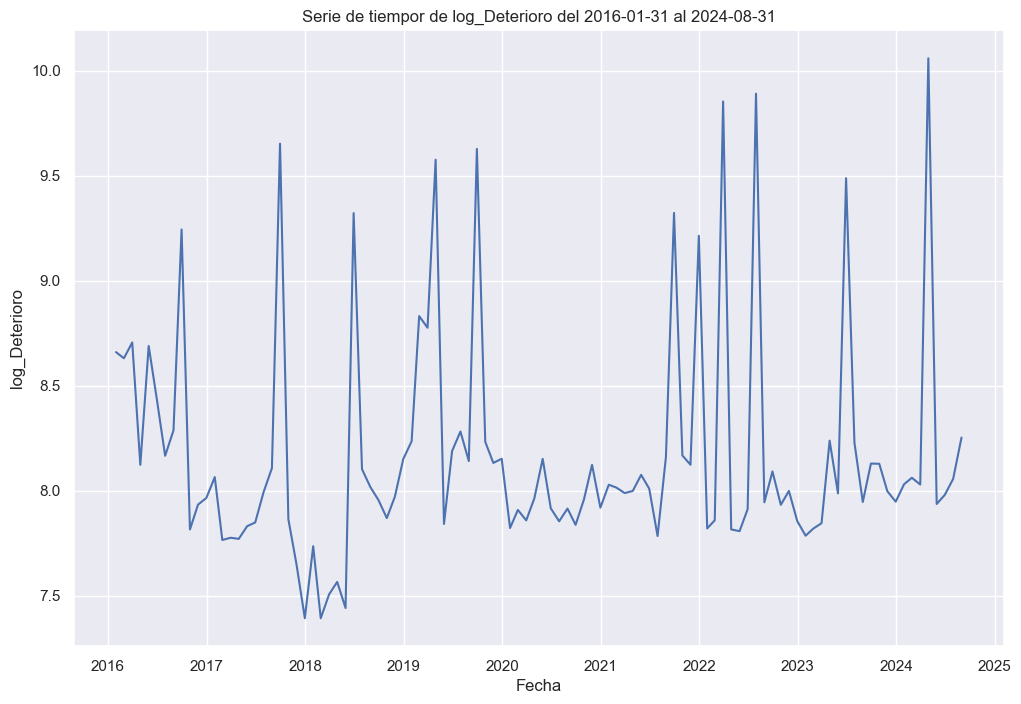

In [11]:
serie_de_tiempo(df_gasto,'log_Deterioro')

In [12]:
adf_test = adfuller(df_gasto['log_Deterioro'])
print(f"Estadístico ADF: {adf_test[0]}")
print(f"P-valor: {adf_test[1]}")
if adf_test[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria. Se debe realizar diferenciación.")

Estadístico ADF: -9.514616296537794
P-valor: 3.1816883598357e-16
La serie es estacionaria.


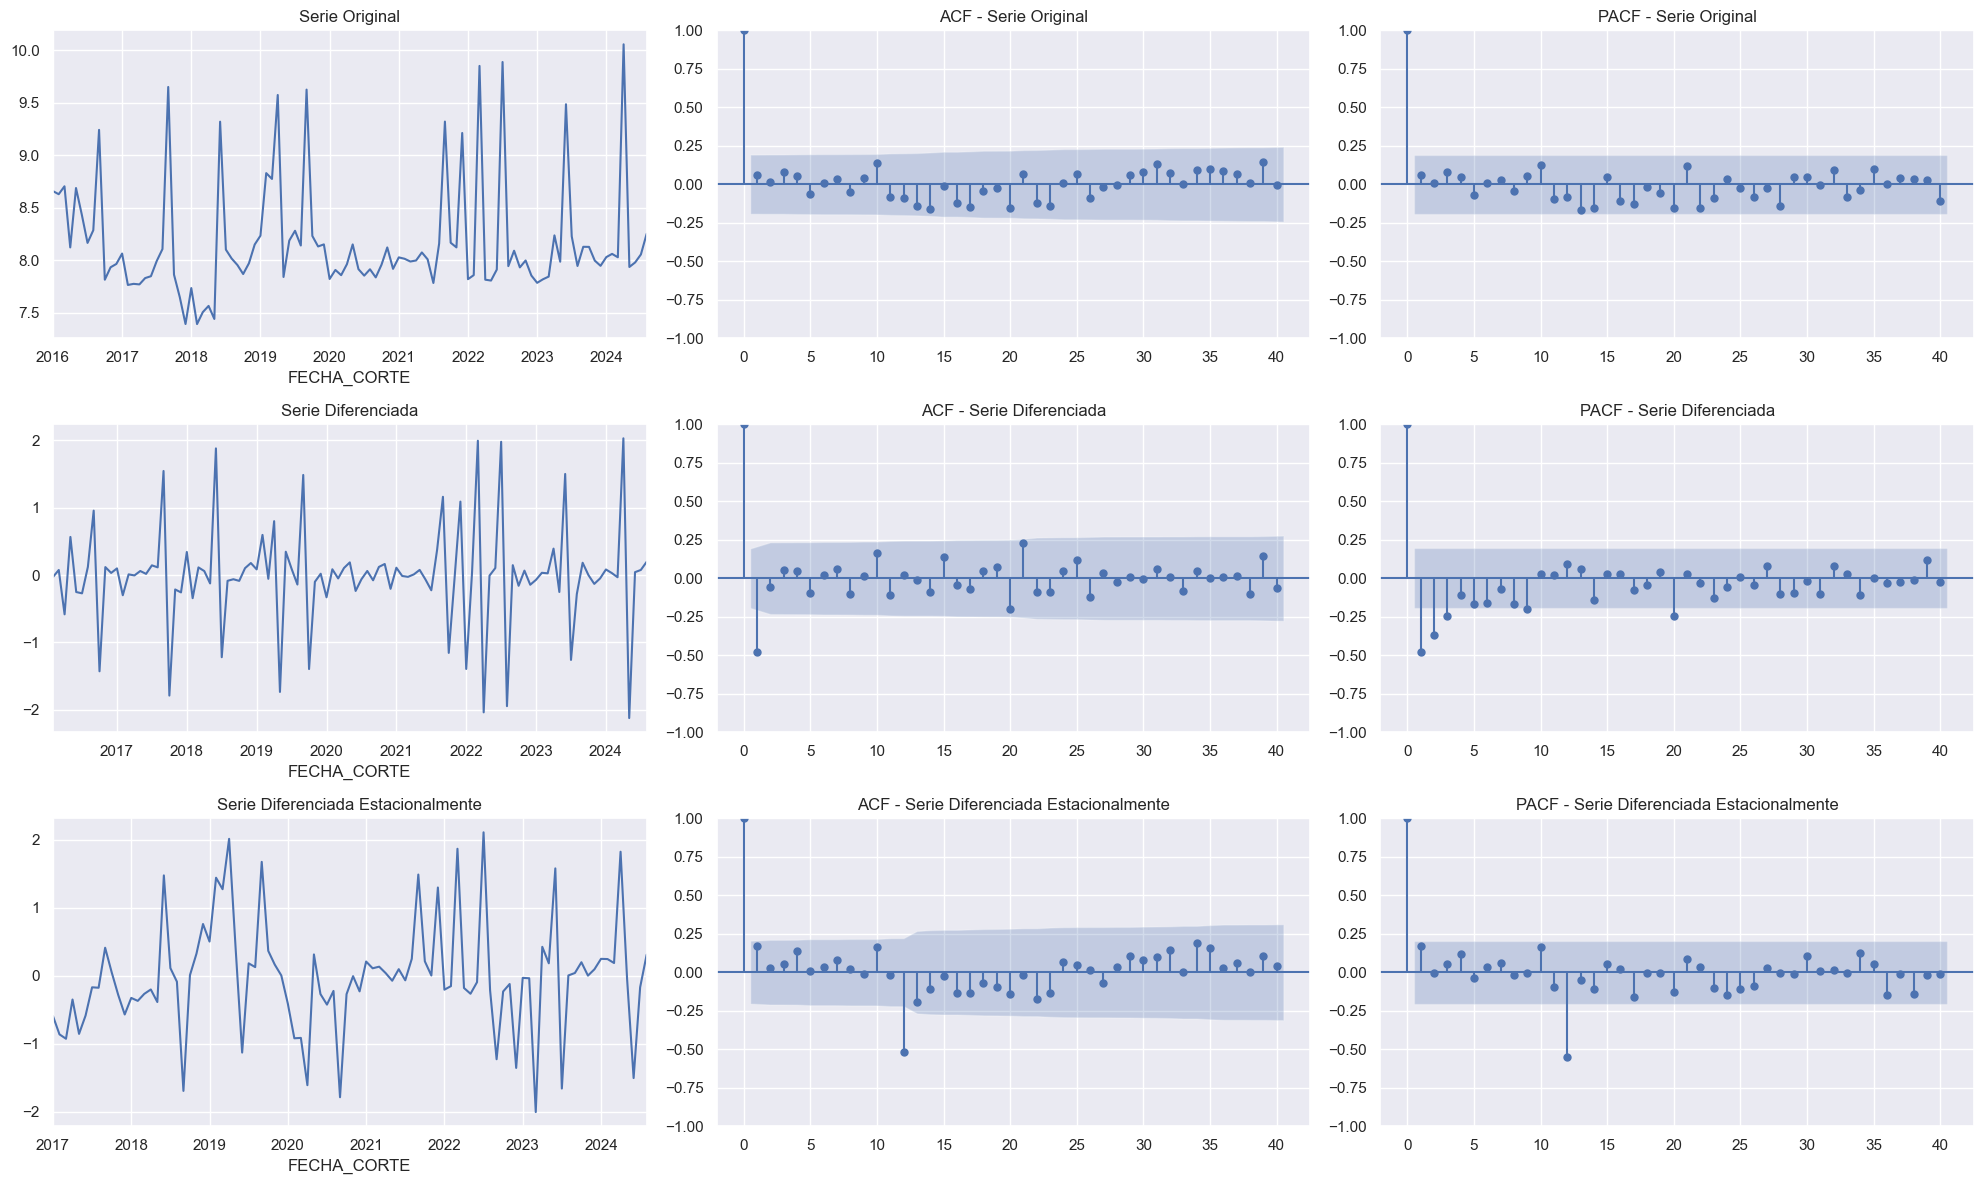

In [11]:
plot_time_series_analysis(df_gasto,'log_Deterioro')

In [13]:
df_gasto['Deterioro'] = df_gasto['log_Deterioro']
df_gasto= df_gasto.drop(columns=['log_Deterioro'])
df_gasto.describe()

,Deterioro
count,104.000000
mean,8.175024
std,0.550004
min,7.392064
25%,7.858359
50%,8.003640
75%,8.172312
max,10.058470


## Analisis Exploratorio de los Datos



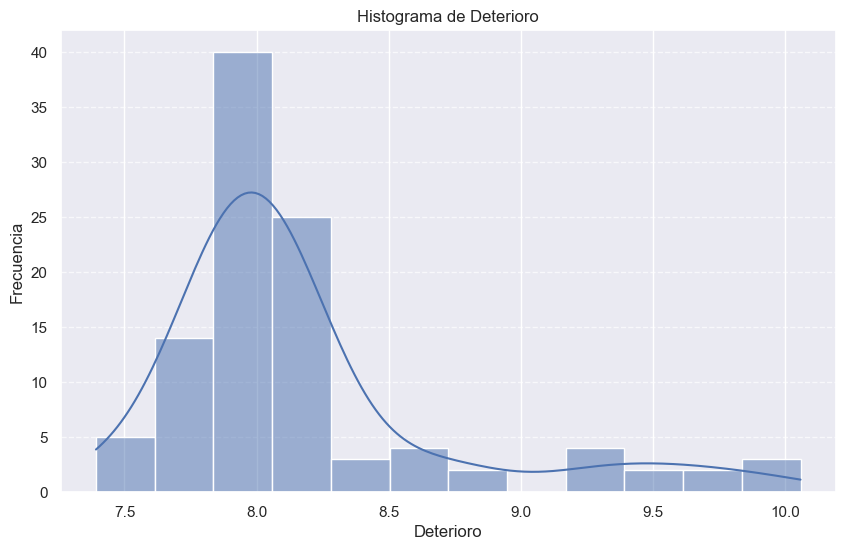

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gasto['Deterioro'], bins=12, kde=True)
plt.title('Histograma de Deterioro')
plt.xlabel('Deterioro')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle = '--', alpha = 0.7)
plt.show()

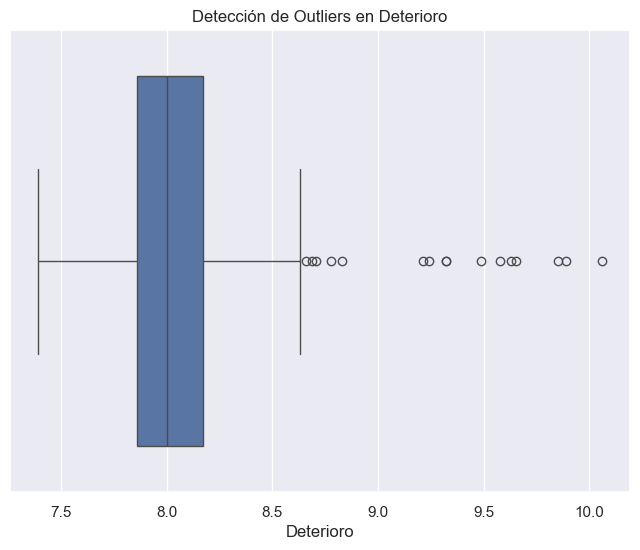

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_gasto['Deterioro'])
plt.title('Detección de Outliers en Deterioro')
plt.show()

In [15]:
print(df_gasto['Deterioro'].describe())

count    104.000000
mean       8.175024
std        0.550004
min        7.392064
25%        7.858359
50%        8.003640
75%        8.172312
max       10.058470
Name: Deterioro, dtype: float64


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


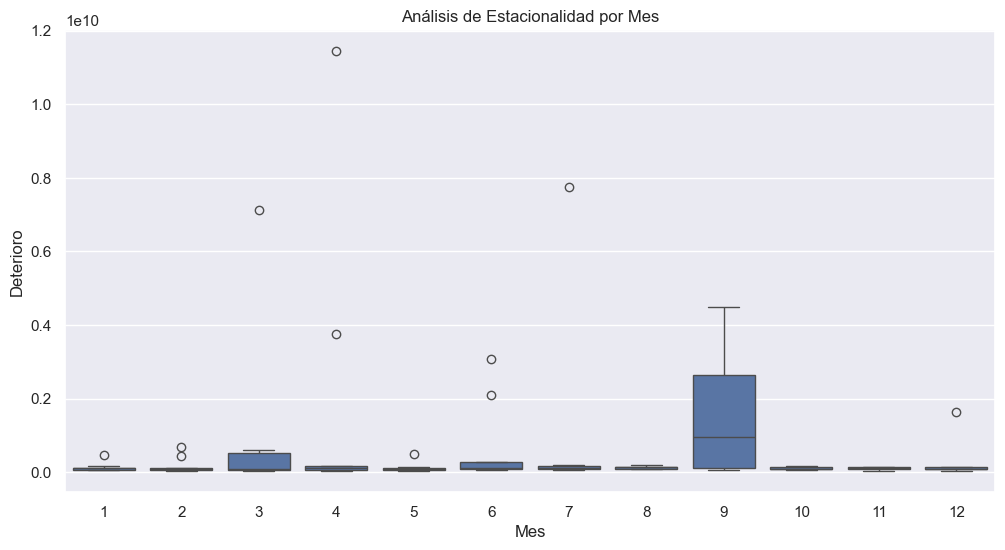

In [16]:
df['Mes'] = df_gasto.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Mes', y='Deterioro', data=df)
plt.title('Análisis de Estacionalidad por Mes')
plt.xlabel('Mes')
plt.ylabel('Deterioro')
plt.show()

# Modelos SARIMA

Aplicar la metodologia Box Jenkins


## Identificación

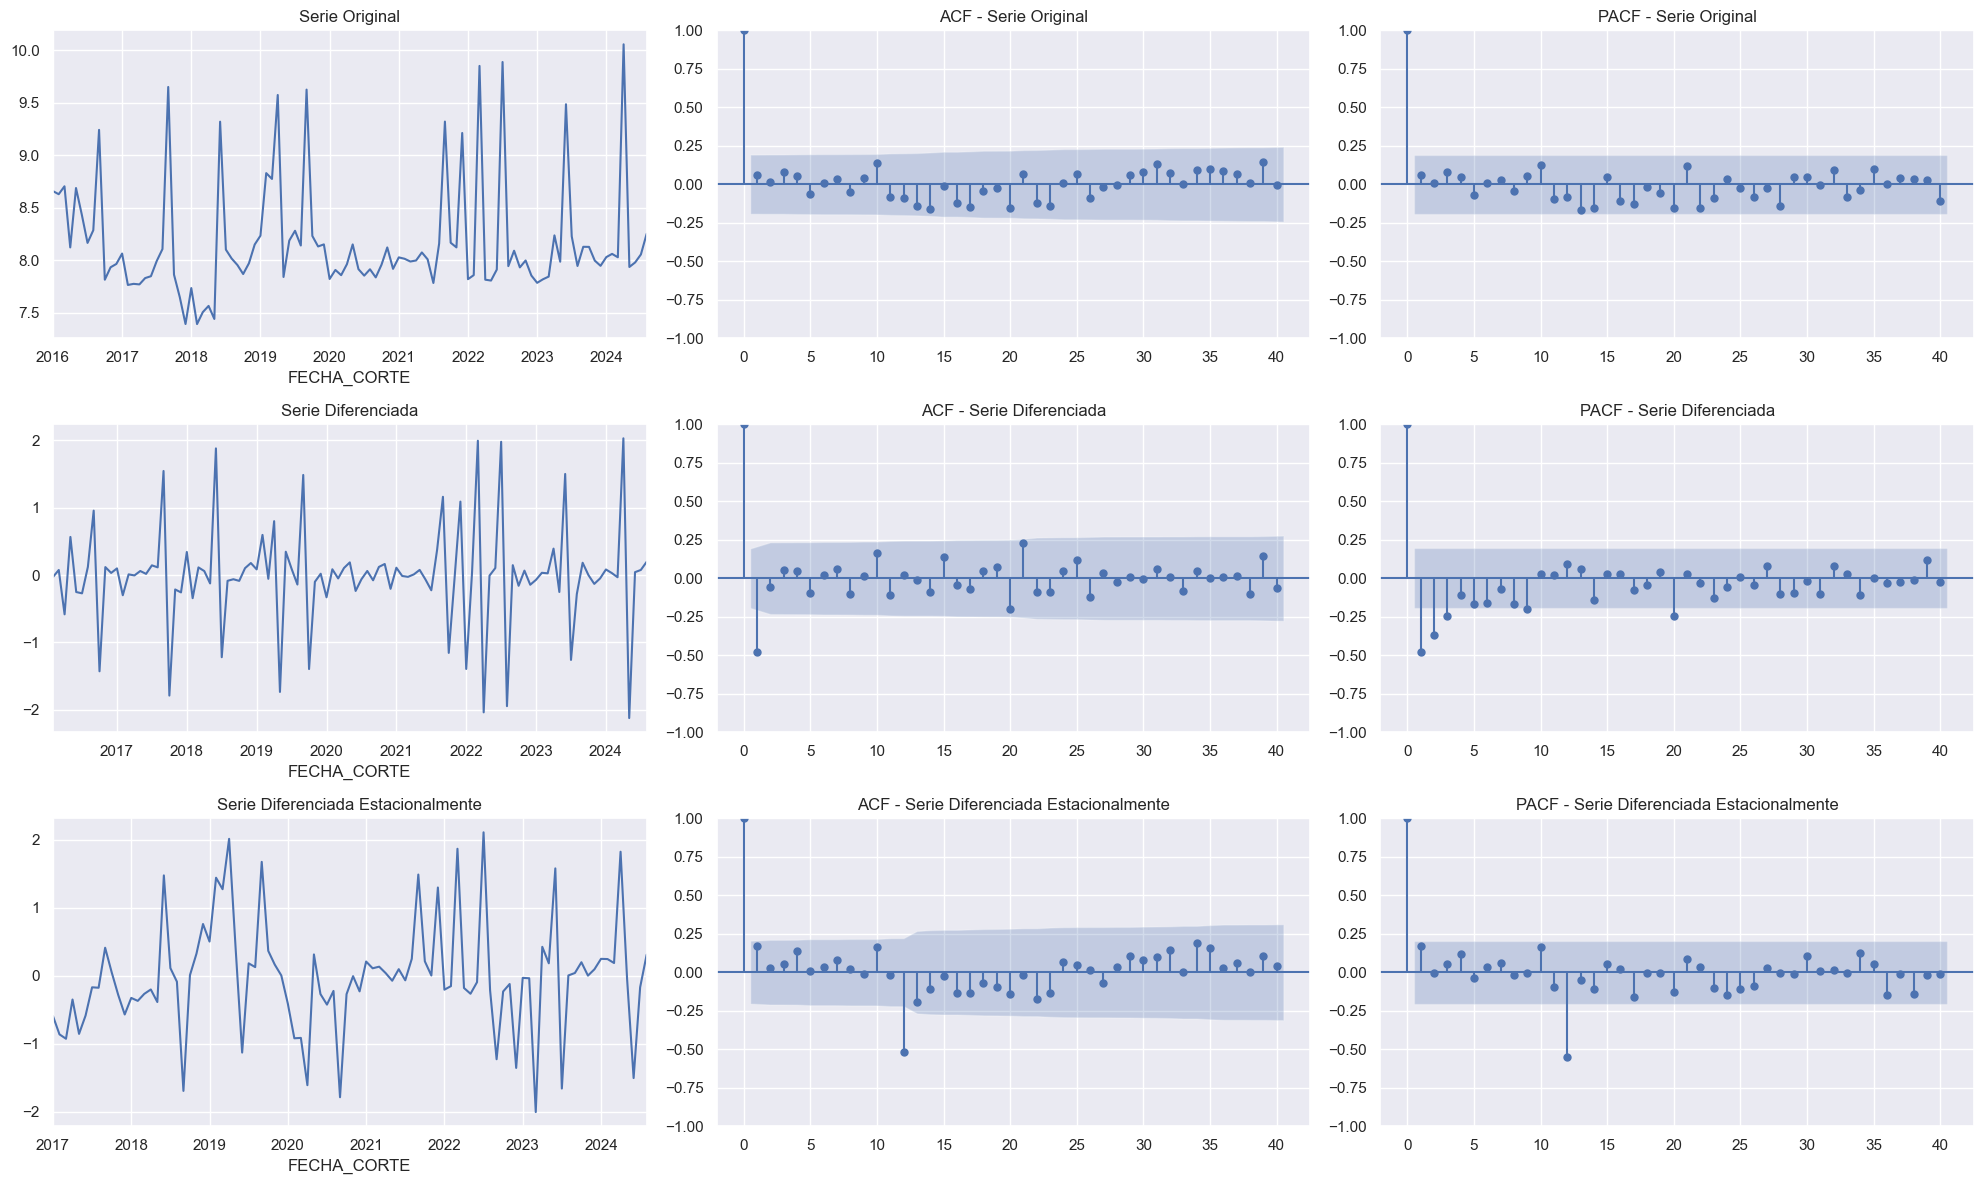

In [17]:
plot_time_series_analysis(df_gasto,'Deterioro')

In [18]:
# prueba de Dickey Fuller para las series
SerieOriginal_adf = adfuller(df_gasto['Deterioro'])

print('ADF Statistic:', SerieOriginal_adf[0])
print('p-value:', SerieOriginal_adf[1])
print('Critical Values:')
for key, value in SerieOriginal_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -9.514616296537794
p-value: 3.1816883598357e-16
Critical Values:
	1%: -3.4954932834550623
	5%: -2.8900369024285117
	10%: -2.5819706975209726


In [19]:
SerieDiferenciada_adf = adfuller(df_gasto['Deterioro'].diff().dropna())

print('ADF Statistic:', SerieDiferenciada_adf[0])
print('p-value:', SerieDiferenciada_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciada_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -6.012506605752662
p-value: 1.5613155425683234e-07
Critical Values:
	1%: -3.5019123847798657
	5%: -2.892815255482889
	10%: -2.583453861475781


In [20]:
SerieDiferenciadaEst_adf = adfuller(df_gasto['Deterioro'].diff(12).dropna())

print('ADF Statistic:', SerieDiferenciadaEst_adf[0])
print('p-value:', SerieDiferenciadaEst_adf[1])
print('Critical Values:')
for key, value in SerieDiferenciadaEst_adf[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -4.0401740270053175
p-value: 0.0012141581662072005
Critical Values:
	1%: -3.5148692050781247
	5%: -2.8984085156250003
	10%: -2.58643890625


In [15]:
Entrenamiento_df= df_gasto[:98]
Prueba_df= df_gasto[98:]

display(Prueba_df,Entrenamiento_df)

,Deterioro
FECHA_CORTE,
2024-03-31,8.028687
2024-04-30,10.058470
2024-05-31,7.936171
2024-06-30,7.979451
2024-07-31,8.055558
2024-08-31,8.252405


,Deterioro
FECHA_CORTE,
2016-01-31,8.659167
2016-02-29,8.629858
2016-03-31,8.705258
2016-04-30,8.122614
2016-05-31,8.688586
...,...
2023-10-31,8.127657
2023-11-30,7.996787
2023-12-31,7.947172


In [16]:
modelo1 = pm.auto_arima(Entrenamiento_df,seasonal=True,m=12,
                        d=1,D=1,start_p=0,start_q=0, max_p= 4, max_q=4,
                        start_P=0,start_Q=0, max_P= 4, max_Q=4,
                        information_criterion='aic',trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=249.588, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=193.171, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=233.335, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=189.692, Time=0.86 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=189.416, Time=1.32 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=187.014, Time=2.86 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=188.800, Time=5.06 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=189.485, Time=2.30 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=203.960, Time=2.04 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=178.732, Time=4.82 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=184.318, Time=2.56 sec
 ARIMA(2,1,0)(4,1,1)[12]             : AIC=180.702, Time=6.64 sec
 ARIMA(2,1,0)(3,1,1)[12]             : AIC=183.115, Time=3.50 sec
 ARIMA(3,1,0)(4,1,0)[12]             

In [17]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(4, 1, 0, 12)   Log Likelihood                 -76.950
Date:                            Fri, 29 Nov 2024   AIC                            169.901
Time:                                    21:41:45   BIC                            189.442
Sample:                                01-31-2016   HQIC                           177.761
                                     - 02-29-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7200      0.101     -7.112      0.000      -0.918      -0.522
ar.L2         -0.5654      0.136     -4.162      0.000      -0.832      -0.299
ar.L3         -0.3515      0.082     -4.271      0.000      -0.513      -0.190
ar.S.L12      -0.9888      0.159     -6.229      0.000      -1.300      -0.678
ar.S.L24      -0.7100      0.230     -3.085      0.002      -1.161      -0.259
ar.S.L36      -0.6291      0.171     -3.687      0.000      -0.964      -0.295
ar.S.L48      -0.4909      0.138     -3.547      0.000      -0.762      -0.220
sigma2         0.2697      0.043      6.251      0.000       0.185       0.354
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                11.10
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.58
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicción


In [ ]:
modelo_SM = SARIMAX(Entrenamiento_df,order=(3,0,0),seasonal=(4,0,0,12),freq="ME",enforce_stationarity=False,enforce_invertibility=False)
modeloSM_fit = modelo_SM.fit(disp=0)
modeloSM_fit.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Deterioro   No. Observations:                   98
Model:               SARIMAX(3, 0, 0)   Log Likelihood                 -84.782
Date:                Fri, 29 Nov 2024   AIC                            177.564
Time:                        22:16:10   BIC                            187.780
Sample:                    01-31-2016   HQIC                           181.692
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3491      0.099      3.544      0.000       0.156       0.542
ar.L2          0.2715      0.110      2.476      0.013       0.057       0.486
ar.L3          0.3764      0.082      4.578      0.000       0.215       0.537
sigma2         0.3489      0.044      7.996      0.000       0.263       0.434
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                55.13
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                             1.38
Prob(H) (two-sided):                  0.41   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
Pr_stmodels = modeloSM_fit.get_forecast(steps=6).predicted_mean
print ( Pr_stmodels)

2024-03-31    7.985510
2024-04-30    7.998772
2024-05-31    7.994483
2024-06-30    7.968203
2024-07-31    7.962855
2024-08-31    7.952238
Freq: ME, Name: predicted_mean, dtype: float64


In [42]:
modelo_SK = Sarimax(order=(3,0,0),seasonal_order=(4,0,0,12),freq='ME')
modelo_SK.fit(y=Entrenamiento_df)
modelo_SK.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Deterioro   No. Observations:                   98
Model:             SARIMAX(3, 0, 0)x(4, 0, 0, 12)   Log Likelihood                -136.312
Date:                            Fri, 29 Nov 2024   AIC                            288.624
Time:                                    22:16:42   BIC                            309.303
Sample:                                01-31-2016   HQIC                           296.988
                                     - 02-29-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3983      0.072      5.559      0.000       0.258       0.539
ar.L2          0.3386      0.086      3.949      0.000       0.171       0.507
ar.L3          0.2595      0.073      3.533      0.000       0.116       0.403
ar.S.L12       0.1477      0.088      1.679      0.093      -0.025       0.320
ar.S.L24       0.3897      0.099      3.919      0.000       0.195       0.585
ar.S.L36       0.2867      0.109      2.627      0.009       0.073       0.501
ar.S.L48       0.1757      0.125      1.406      0.160      -0.069       0.421
sigma2         0.3455      0.037      9.412      0.000       0.274       0.417
===================================================================================
Ljung-Box (L1) (Q):                   1.24   Jarque-Bera (JB):                32.95
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               2.81   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
Pr_skforecast = modelo_SK.predict(steps=6)
print(Pr_skforecast)

                pred
2024-03-31  8.653414
2024-04-30  8.041873
2024-05-31  8.039284
2024-06-30  8.224814
2024-07-31  8.748546
2024-08-31  8.062853


In [44]:
modelo_PD = pm.ARIMA(order=(3,0,0),seasonal_order=(4,0,0,12))
modelo_PD.fit(y=Entrenamiento_df)
modelo_PD.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   98
Model:             SARIMAX(3, 0, 0)x(4, 0, 0, 12)   Log Likelihood                -119.573
Date:                            Fri, 29 Nov 2024   AIC                            257.146
Time:                                    22:17:13   BIC                            280.411
Sample:                                01-31-2016   HQIC                           266.556
                                     - 02-29-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.030      0.061      0.952      -0.057       0.061
ar.L1          0.0599      0.087      0.689      0.491      -0.111       0.230
ar.L2          0.0924      0.096      0.964      0.335      -0.096       0.280
ar.L3          0.0569      0.058      0.973      0.330      -0.058       0.171
ar.S.L12       0.0820      0.089      0.920      0.358      -0.093       0.257
ar.S.L24       0.3265      0.106      3.076      0.002       0.118       0.535
ar.S.L36       0.3859      0.092      4.202      0.000       0.206       0.566
ar.S.L48       0.2054      0.121      1.699      0.089      -0.032       0.442
sigma2         0.2808      0.031      9.194      0.000       0.221       0.341
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                69.72
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             1.25
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
Pr_pmdarima = modelo_PD.predict(steps=6)
Pr_pmdarima = Pr_pmdarima[:6]
print(Pr_pmdarima)

2024-03-31    8.553994
2024-04-30    7.970633
2024-05-31    8.004315
2024-06-30    8.081361
2024-07-31    8.524228
2024-08-31    8.022501
Freq: ME, dtype: float64


In [75]:
modelo_PDA = pm.ARIMA(order=(3,1,0),seasonal_order=(4,1,0,12))
modelo_PDA.fit(y=Entrenamiento_df)
modelo_PDA.summary()

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   98
Model:             SARIMAX(3, 1, 0)x(4, 1, 0, 12)   Log Likelihood                 -76.891
Date:                            Fri, 29 Nov 2024   AIC                            171.783
Time:                                    22:57:23   BIC                            193.767
Sample:                                01-31-2016   HQIC                           180.626
                                     - 02-29-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0271      0.086      0.314      0.753      -0.142       0.196
ar.L1         -0.7205      0.099     -7.255      0.000      -0.915      -0.526
ar.L2         -0.5663      0.136     -4.174      0.000      -0.832      -0.300
ar.L3         -0.3521      0.083     -4.257      0.000      -0.514      -0.190
ar.S.L12      -0.9873      0.158     -6.265      0.000      -1.296      -0.678
ar.S.L24      -0.7067      0.232     -3.042      0.002      -1.162      -0.251
ar.S.L36      -0.6293      0.171     -3.689      0.000      -0.964      -0.295
ar.S.L48      -0.4913      0.139     -3.528      0.000      -0.764      -0.218
sigma2         0.2694      0.045      6.007      0.000       0.181       0.357
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                10.62
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.57
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
Pr_pmdarimaA = modelo_PDA.predict(steps=6)
Pr_pmdarimaA = Pr_pmdarimaA[:6]
print(Pr_pmdarimaA)

2024-03-31    8.701105
2024-04-30    8.481347
2024-05-31    7.761111
2024-06-30    7.887285
2024-07-31    8.474873
2024-08-31    7.894405
Freq: ME, dtype: float64


In [85]:
fitted_model = modelo_PDA.fit(Entrenamiento_df)
forecast = fitted_model.predict(steps=10)
print(forecast)

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


2024-03-31    8.701105
2024-04-30    8.481347
2024-05-31    7.761111
2024-06-30    7.887285
2024-07-31    8.474873
2024-08-31    7.894405
2024-09-30    8.777232
2024-10-31    7.969815
2024-11-30    7.970149
2024-12-31    8.004795
Freq: ME, dtype: float64


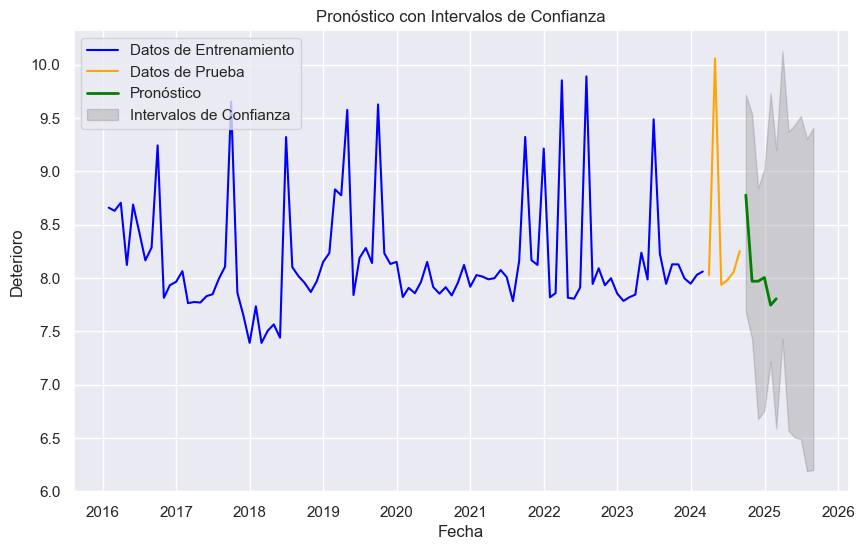

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que Entrenamiento_df es el DataFrame de los datos de entrenamiento,
# y Test_df es el DataFrame de los datos de prueba.
# Además, 'forecast' contiene las predicciones del modelo para los próximos 10 pasos.

# Predecir con el modelo ajustado
forecast, conf_int = fitted_model.predict(n_periods=12, return_conf_int=True)

# Crear el índice de fechas para el pronóstico (ajustarlo a tu frecuencia temporal)
forecast_index = pd.date_range(start=Prueba_df.index[-1] + pd.Timedelta(days=1), periods=12, freq='M')

# Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Crear DataFrame para los intervalos de confianza
conf_int_df = pd.DataFrame(conf_int, index=forecast_index, columns=['Lower CI', 'Upper CI'])

# Graficar los datos de entrenamiento, prueba y pronóstico con intervalos de confianza
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento
plt.plot(Entrenamiento_df.index, Entrenamiento_df, label='Datos de Entrenamiento', color='blue')

# Graficar los datos de prueba
plt.plot(Prueba_df.index, Prueba_df, label='Datos de Prueba', color='orange')

# Graficar el pronóstico
plt.plot(forecast_df.index, forecast_df, label='Pronóstico', color='green', linewidth=2)

# Graficar los intervalos de confianza
plt.fill_between(conf_int_df.index, conf_int_df['Lower CI'], conf_int_df['Upper CI'], color='gray', alpha=0.3, label='Intervalos de Confianza')

# Añadir etiquetas y leyenda
plt.title('Pronóstico con Intervalos de Confianza')
plt.xlabel('Fecha')
plt.ylabel('Deterioro')
plt.legend(loc='upper left')

# Mostrar la gráfica
plt.show()


In [ ]:
forecast_df)


,Forecast
2024-09-30,8.777232
2024-10-31,7.969815
2024-11-30,7.970149
2024-12-31,8.004795
2025-01-31,7.745855
2025-02-28,7.805748
2025-03-31,NaN
2025-04-30,NaN
2025-05-31,NaN
2025-06-30,NaN


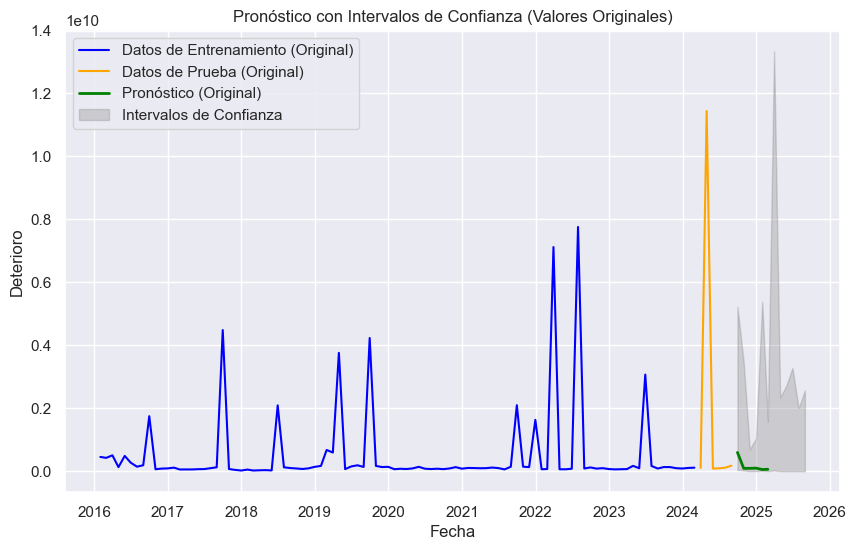

,Forecast
2024-09-30,5.987312e+08
2024-10-31,9.328570e+07
2024-11-30,9.335749e+07
2024-12-31,1.011102e+08
2025-01-31,5.569999e+07
2025-02-28,6.393641e+07
2025-03-31,NaN
2025-04-30,NaN
2025-05-31,NaN
2025-06-30,NaN


In [99]:
import numpy as np

# Deshacer la transformación logarítmica sobre las predicciones
forecast_original = 10 ** forecast  # Esto deshace la transformación logarítmica

# También deshacer la transformación logarítmica sobre los intervalos de confianza
lower_conf_int_original = 10 ** conf_int[:, 0]  # Lower CI (bajo)
upper_conf_int_original = 10 ** conf_int[:, 1]  # Upper CI (alto)

# Crear un DataFrame para las predicciones originales
forecast_df_original = pd.DataFrame(forecast_original, index=forecast_index, columns=['Forecast'])

# Crear DataFrame para los intervalos de confianza originales
conf_int_df_original = pd.DataFrame({
    'Lower CI': lower_conf_int_original,
    'Upper CI': upper_conf_int_original
}, index=forecast_index)

# Graficar los datos originales (sin logaritmo)
plt.figure(figsize=(10, 6))

# Graficar los datos de entrenamiento (original)
plt.plot(Entrenamiento_df.index, 10 ** Entrenamiento_df, label='Datos de Entrenamiento (Original)', color='blue')

# Graficar los datos de prueba (original)
plt.plot(Prueba_df.index, 10 ** Prueba_df, label='Datos de Prueba (Original)', color='orange')

# Graficar el pronóstico (en valores originales)
plt.plot(forecast_df_original.index, forecast_df_original, label='Pronóstico (Original)', color='green', linewidth=2)

# Graficar los intervalos de confianza (en valores originales)
plt.fill_between(conf_int_df_original.index, conf_int_df_original['Lower CI'], conf_int_df_original['Upper CI'], color='gray', alpha=0.3, label='Intervalos de Confianza')

# Añadir etiquetas y leyenda
plt.title('Pronóstico con Intervalos de Confianza (Valores Originales)')
plt.xlabel('Fecha')
plt.ylabel('Deterioro')
plt.legend(loc='upper left')

# Mostrar la gráfica
plt.show()

# Mostrar las predicciones originales
forecast_df_original


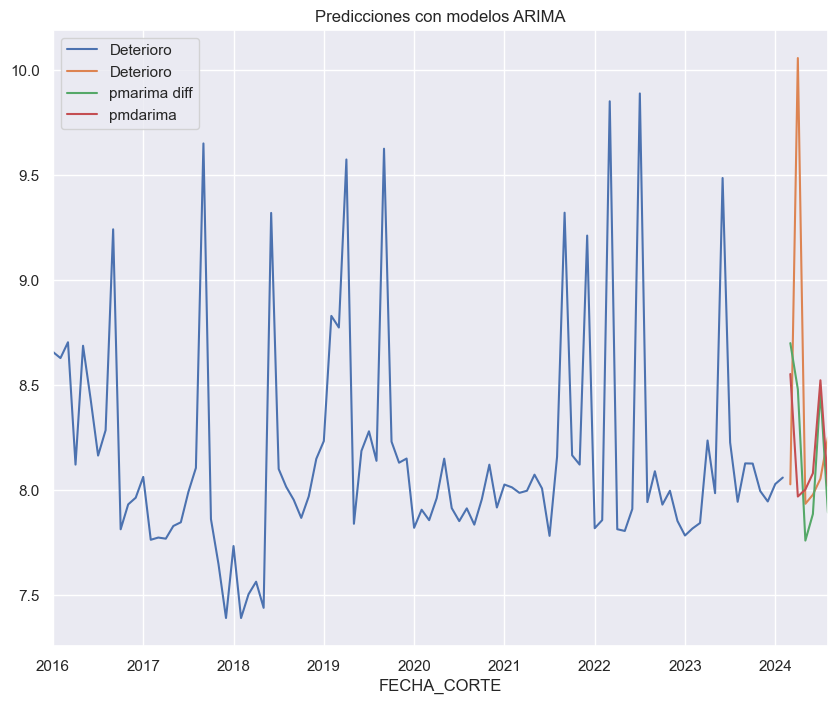

In [77]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(10 , 8))
Entrenamiento_df.plot(ax=ax,label='Entrenamiento')
Prueba_df.plot(ax=ax,label='Prueba')
Pr_pmdarimaA.plot(ax=ax, label = 'pmarima diff')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

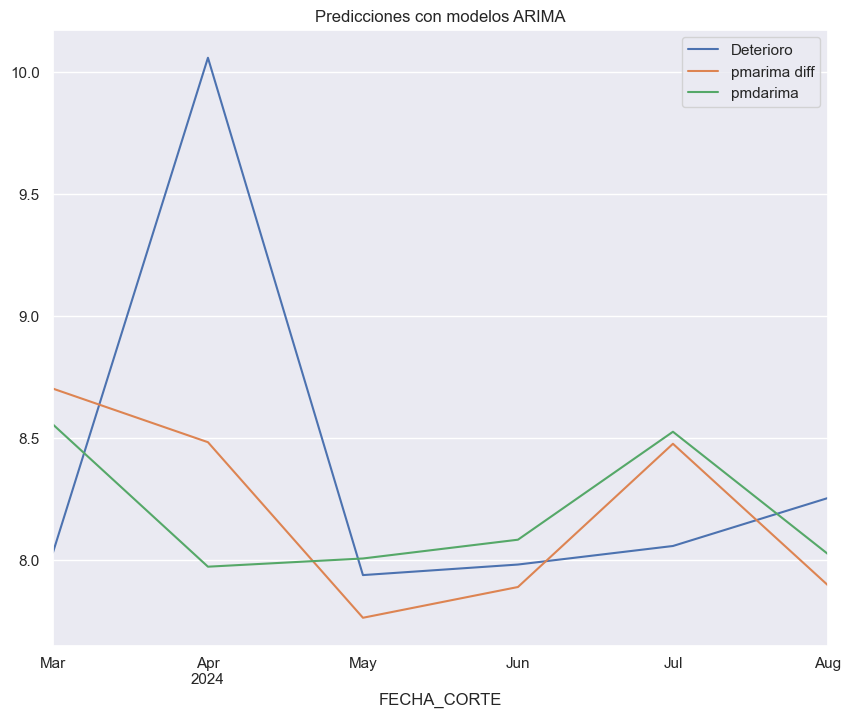

In [78]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_pmdarimaA.plot(ax=ax, label = 'pmarima diff')
Pr_pmdarima.plot(ax=ax, label='pmdarima')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()


In [48]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_skforecast)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_skforecast):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_skforecast)*100:.2f}%")

MAE 0.65
MSE: 0.84
RMSE: 0.92
MAPE: 7.18%


In [49]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_stmodels)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_stmodels):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_stmodels)*100:.2f}%")

MAE 0.43
MSE: 0.72
RMSE: 0.85
MAPE: 4.45%


In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_pmdarima[:6])
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_pmdarima[:6]):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_pmdarima[:6]):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_pmdarima[:6])*100:.2f}%")

MAE 0.58
MSE: 0.82
RMSE: 0.91
MAPE: 6.34%


In [79]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df["Deterioro"],Pr_pmdarimaA[:6])
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df['Deterioro'],Pr_pmdarimaA[:6]):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df['Deterioro'],Pr_pmdarimaA[:6]):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df['Deterioro'], Pr_pmdarimaA[:6])*100:.2f}%")

MAE 0.55
MSE: 0.55
RMSE: 0.74
MAPE: 6.16%


In [ ]:
forecast_steps = 10

forecast = .forecast

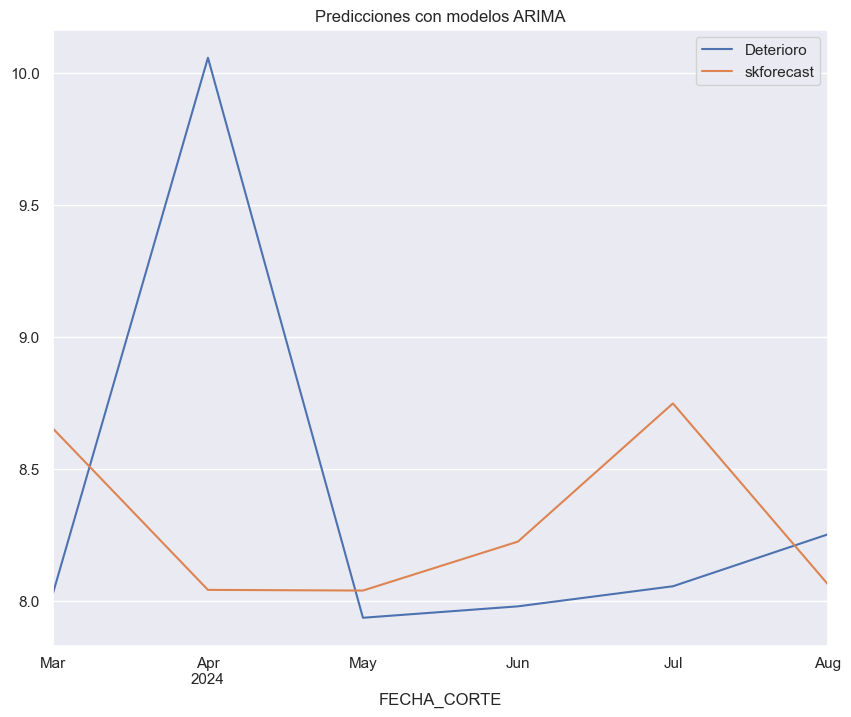

In [51]:
fig, ax = plt.subplots(figsize=(10 , 8))

Prueba_df.plot(ax=ax,label='Prueba')
Pr_skforecast.columns = ['skforecast']
Pr_skforecast.plot(ax=ax, label='skforecast')
ax.set_title('Predicciones con modelos ARIMA')
ax.legend()

# Suavizado Exponencial


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial simple'}, xlabel='FECHA_CORTE'>

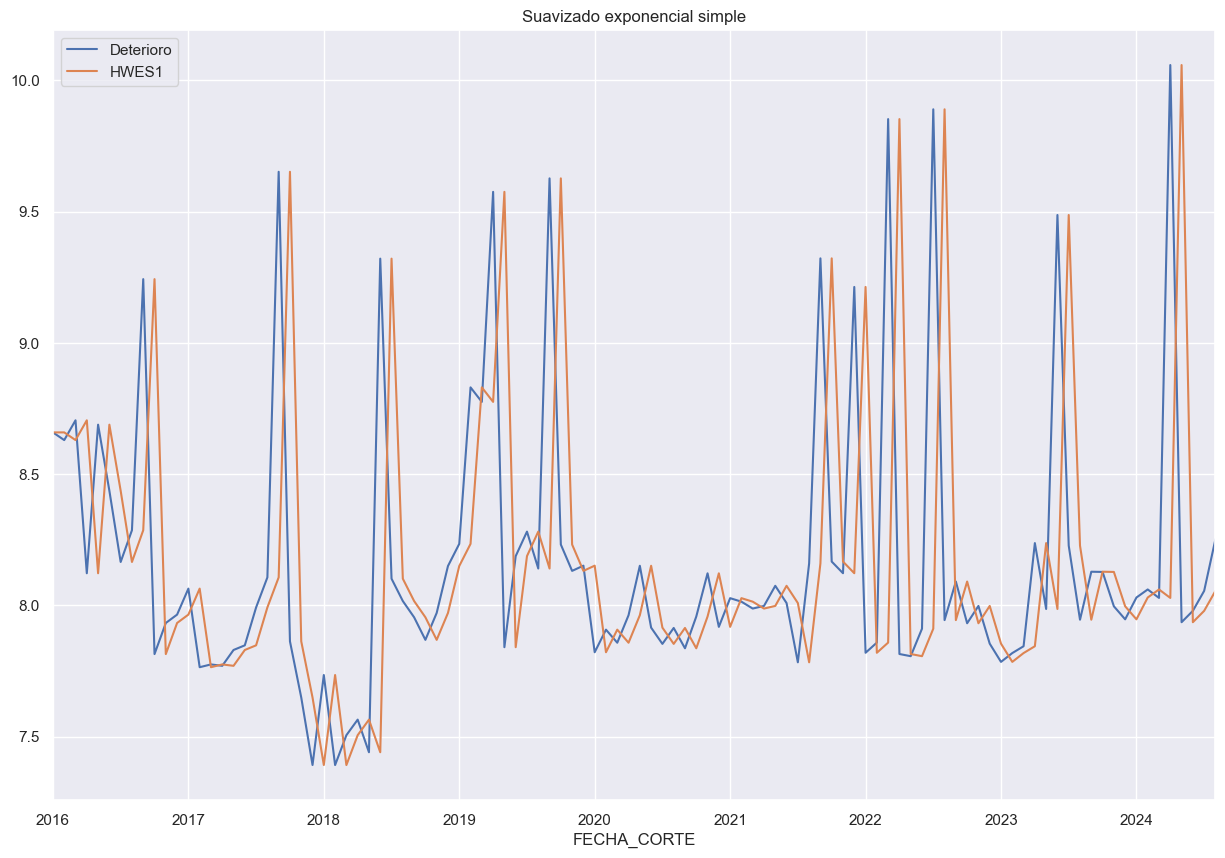

In [57]:
df_s = df_gasto.copy()

#Suavisado Exponencial Simple

df_s['HWES1'] = SimpleExpSmoothing(df_s['Deterioro']).fit(smoothing_level = 1, optimized=False,use_brute=True).fittedvalues
df_s[['Deterioro','HWES1']].plot(title = 'Suavizado exponencial simple',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial doble'}, xlabel='FECHA_CORTE'>

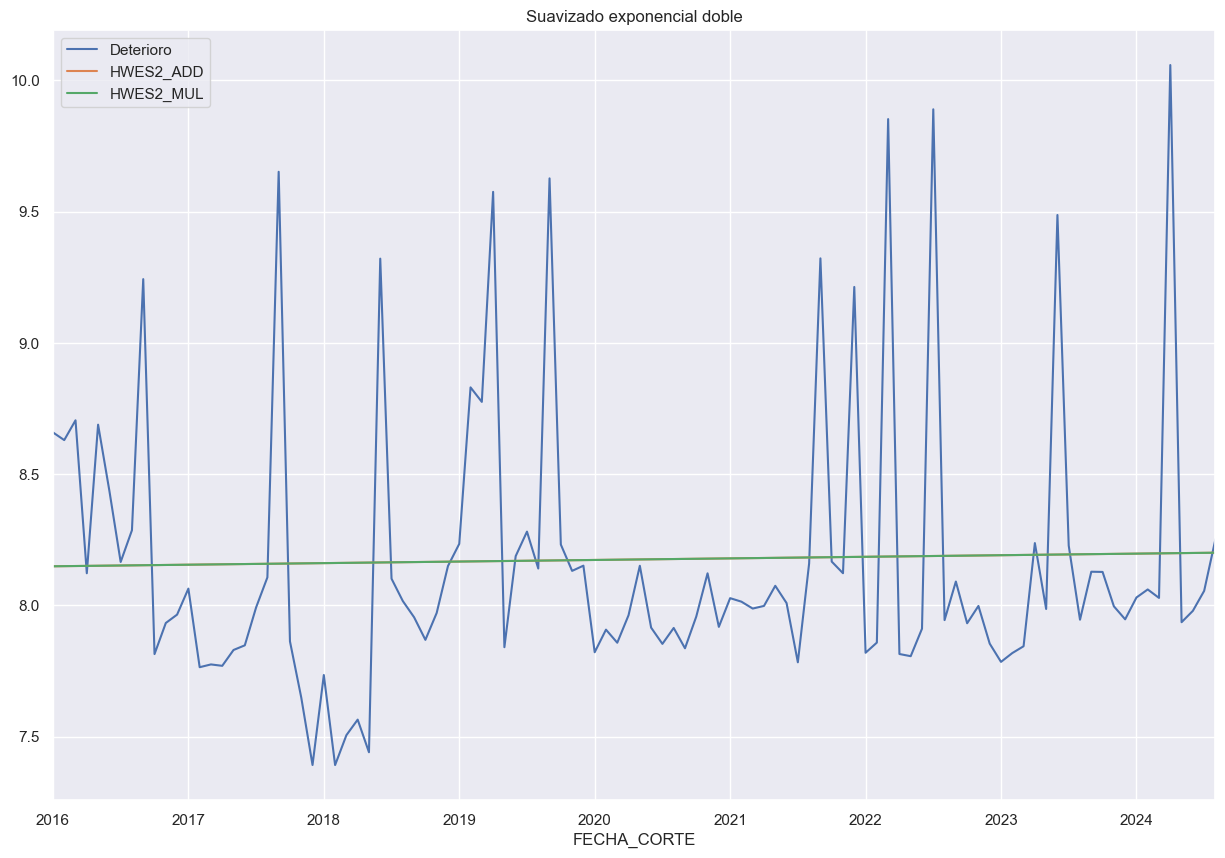

In [58]:
# Suavizado Exponencial doble

df_s['HWES2_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add').fit().fittedvalues
df_s['HWES2_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul').fit().fittedvalues
df_s[['Deterioro', 'HWES2_ADD','HWES2_MUL']].plot(title = 'Suavizado exponencial doble',figsize=(15,10))

/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<Axes: title={'center': 'Suavizado exponencial triple'}, xlabel='FECHA_CORTE'>

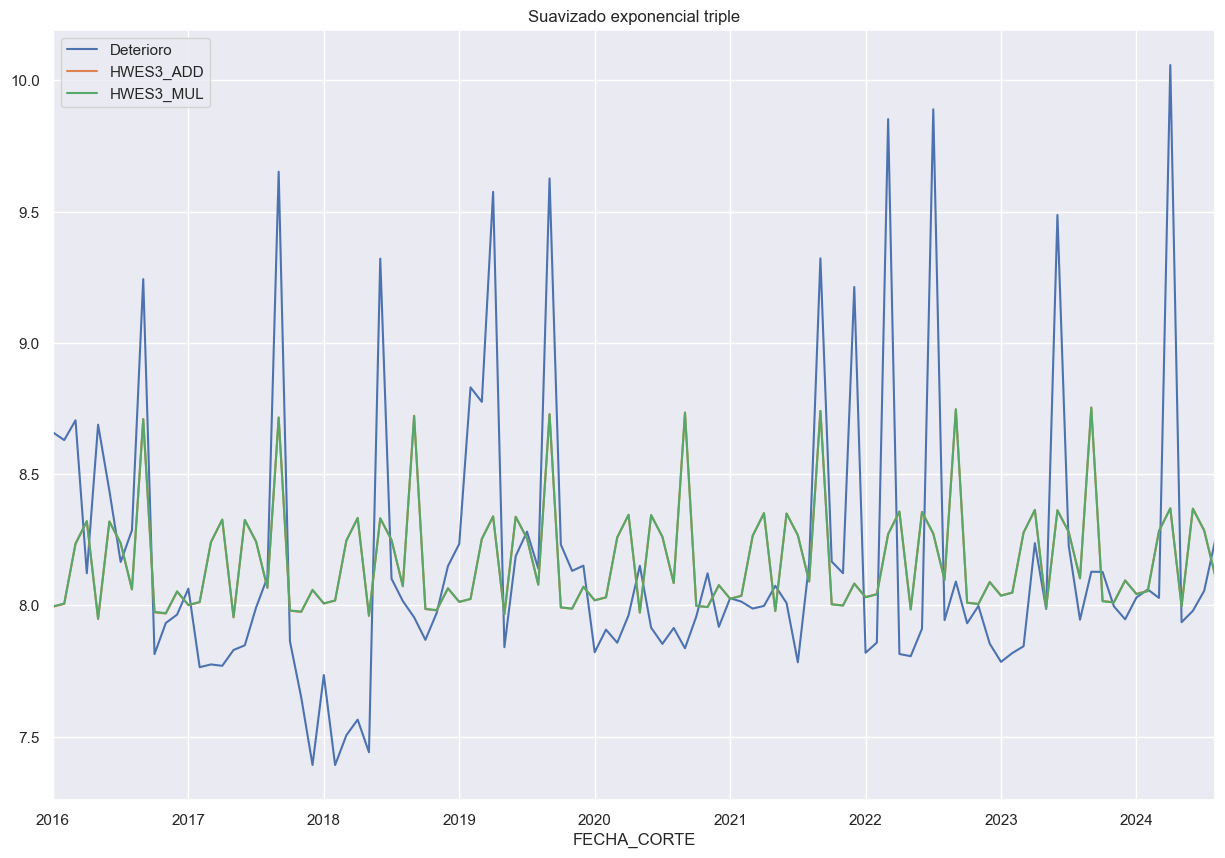

In [59]:
df_s['HWES3_ADD'] = ExponentialSmoothing(df_s['Deterioro'],trend='add',seasonal='add',seasonal_periods = 12).fit().fittedvalues
df_s['HWES3_MUL'] = ExponentialSmoothing(df_s['Deterioro'],trend='mul',seasonal='mul',seasonal_periods = 12).fit().fittedvalues
df_s[['Deterioro', 'HWES3_ADD', 'HWES3_MUL']].plot(title = 'Suavizado exponencial triple',figsize=(15,10))

In [60]:
# Partiendo los datos entre entrenamiento y prueba

Entrenamiento_df_s= df_s[:98]
Prueba_df_s= df_s[98:]

display(Prueba_df_s,Entrenamiento_df_s)

,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2024-03-31,8.028687,8.060927,8.198362,8.198402,8.284168,8.283502
2024-04-30,10.058470,8.028687,8.198864,8.198905,8.369740,8.369991
2024-05-31,7.936171,10.058470,8.199366,8.199409,7.997716,7.995976
2024-06-30,7.979451,7.936171,8.199867,8.199913,8.368939,8.368359
2024-07-31,8.055558,7.979451,8.200369,8.200417,8.286136,8.285591
2024-08-31,8.252405,8.055558,8.200871,8.200921,8.110204,8.108746


,Deterioro,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
FECHA_CORTE,,,,,,
2016-01-31,8.659167,8.659167,8.149177,8.149179,7.994916,7.996097
2016-02-29,8.629858,8.659167,8.149679,8.149680,8.006040,8.007306
2016-03-31,8.705258,8.629858,8.150181,8.150181,8.234594,8.235417
2016-04-30,8.122614,8.705258,8.150683,8.150682,8.320166,8.321404
2016-05-31,8.688586,8.122614,8.151185,8.151183,7.948142,7.949561
...,...,...,...,...,...,...
2023-10-31,8.127657,8.128454,8.195852,8.195883,8.017078,8.015898
2023-11-30,7.996787,8.127657,8.196354,8.196387,8.012382,8.011215
2023-12-31,7.947172,7.996787,8.196856,8.196890,8.095686,8.094819


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


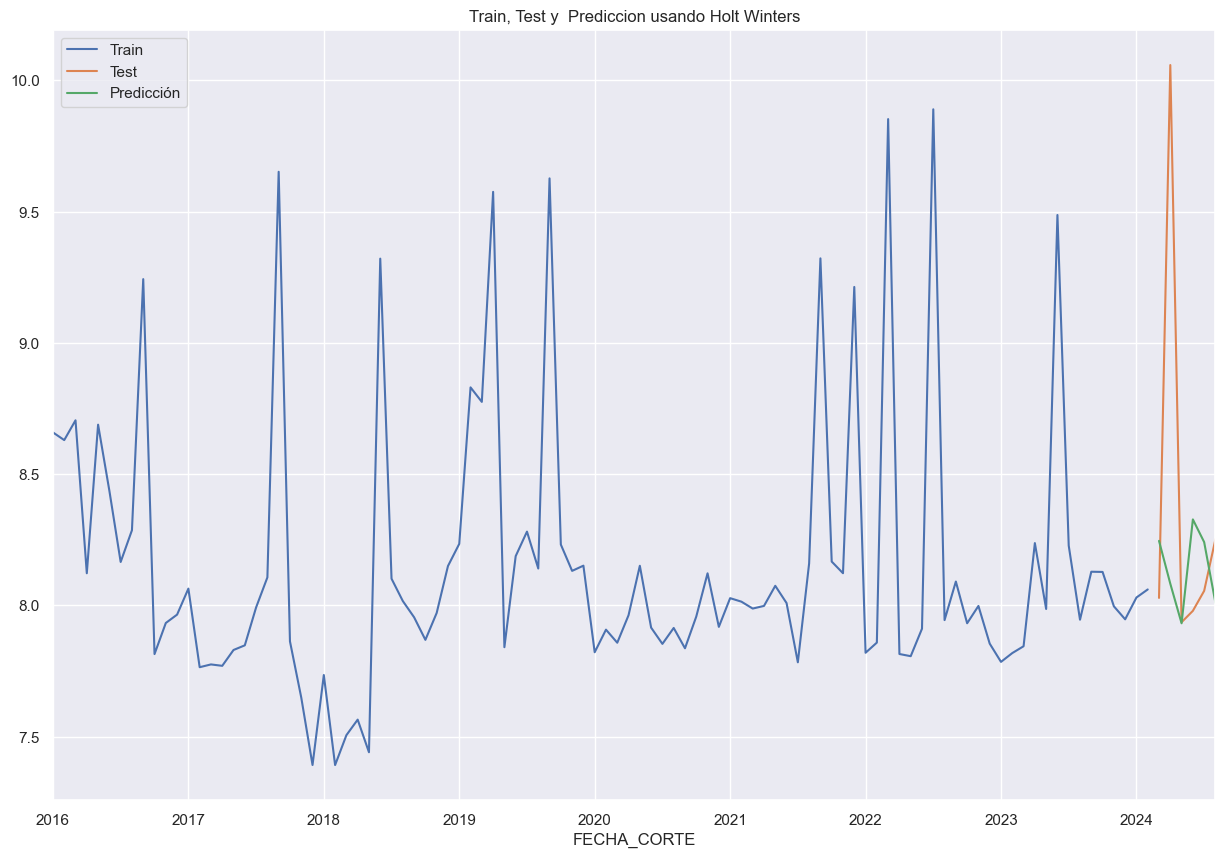

In [61]:
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Deterioro"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(6)
Entrenamiento_df_s["Deterioro"].plot(legend=True,label="Train")
Prueba_df_s["Deterioro"].plot(legend=True,label="Test",figsize=(15,10))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

<Axes: xlabel='FECHA_CORTE'>

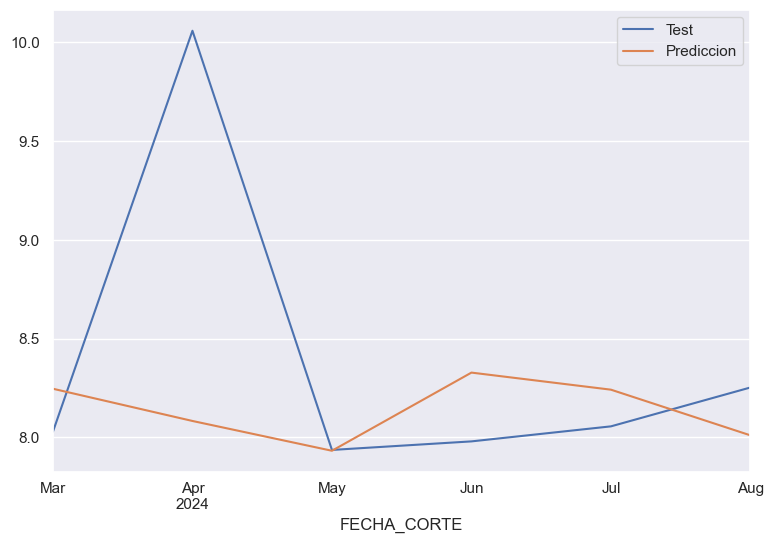

In [62]:
Prueba_df_s['Deterioro'].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion")

In [63]:
# Medidas

from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(Prueba_df_s["Deterioro"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(Prueba_df_s['Deterioro'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(Prueba_df_s['Deterioro'], test_predictions)*100:.2f}%")

MAE 0.50
MSE: 0.69
RMSE: 0.83
MAPE: 5.33%


/home/danielcardenas/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


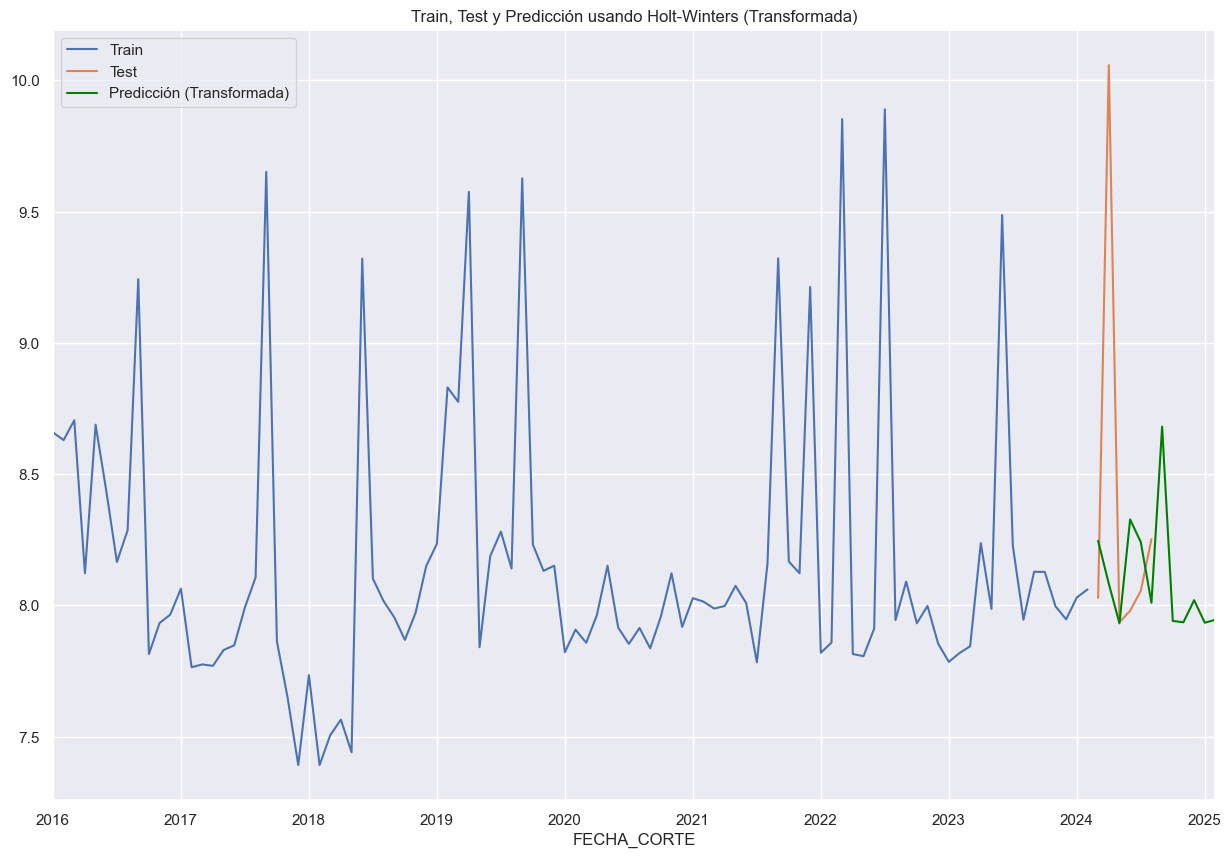

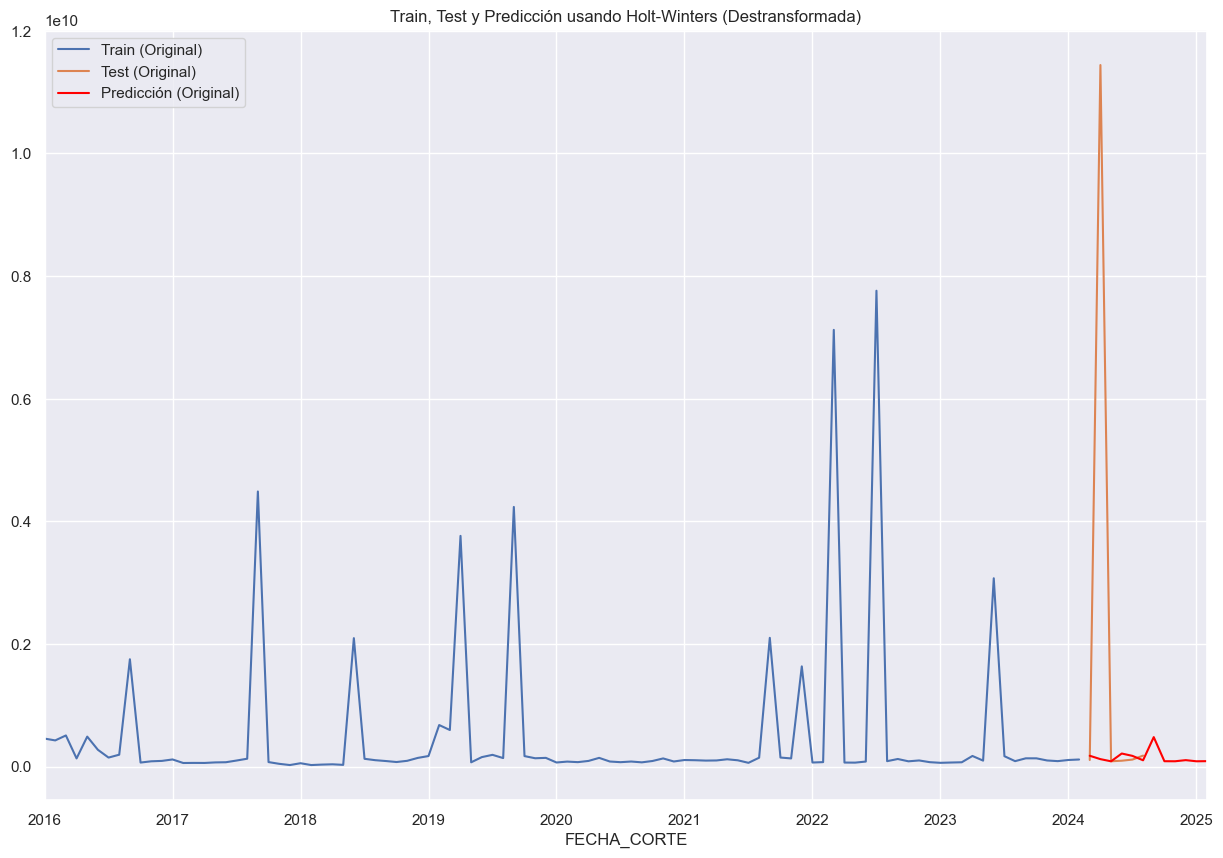

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar el modelo Holt-Winters (Exponential Smoothing) en los datos transformados
fitted_model = ExponentialSmoothing(Entrenamiento_df_s["Deterioro"], trend="mul", seasonal="mul", seasonal_periods=12).fit()

# Realizar las predicciones para los próximos 12 períodos
test_predictions2 = fitted_model.forecast(12)

# Graficar los datos de entrenamiento (serie transformada)
Entrenamiento_df_s["Deterioro"].plot(legend=True, label="Train")

# Graficar los datos de prueba (serie transformada)
Prueba_df_s["Deterioro"].plot(legend=True, label="Test", figsize=(15, 10))

# Graficar las predicciones con la serie transformada (pronóstico logarítmico)
test_predictions2.plot(legend=True, label="Predicción (Transformada)", color='green')

# Título y etiquetas
plt.title("Train, Test y Predicción usando Holt-Winters (Transformada)")
plt.show()

# Ahora, destransformar las predicciones (si se usó logaritmo base 10, por ejemplo)
test_predictions2_original = 10 ** test_predictions2  # Deshacer la transformación logarítmica base 10

# Graficar los datos de entrenamiento destransformados
(10 ** Entrenamiento_df_s["Deterioro"]).plot(legend=True, label="Train (Original)")

# Graficar los datos de prueba destransformados
(10 ** Prueba_df_s["Deterioro"]).plot(legend=True, label="Test (Original)", figsize=(15, 10))

# Graficar las predicciones destransformadas
test_predictions2_original.plot(legend=True, label="Predicción (Original)", color='red')

# Título y etiquetas
plt.title("Train, Test y Predicción usando Holt-Winters (Destransformada)")
plt.show()


In [102]:
test_predictions2_original

2024-03-31    1.761884e+08
2024-04-30    1.210181e+08
2024-05-31    8.550376e+07
2024-06-30    2.126807e+08
2024-07-31    1.742850e+08
2024-08-31    1.023378e+08
2024-09-30    4.801341e+08
2024-10-31    8.729081e+07
2024-11-30    8.628578e+07
2024-12-31    1.047380e+08
2025-01-31    8.594114e+07
2025-02-28    8.823561e+07
Freq: ME, dtype: float64

# Prophet

In [64]:
df_p = df_gasto.copy()
df_p.reset_index(inplace=True)
df_p.rename(columns={'FECHA_CORTE':'ds','Deterioro':'y'}, inplace=True)
df_p

,ds,y
0,2016-01-31,8.659167
1,2016-02-29,8.629858
2,2016-03-31,8.705258
3,2016-04-30,8.122614
4,2016-05-31,8.688586
...,...,...
99,2024-04-30,10.058470
100,2024-05-31,7.936171
101,2024-06-30,7.979451
102,2024-07-31,8.055558


In [65]:
Entrenamiento_df_p= df_p[:98]
Prueba_df_p= df_p[98:]

display(Entrenamiento_df_p.tail(), Prueba_df_p.tail())

,ds,y
93,2023-10-31,8.127657
94,2023-11-30,7.996787
95,2023-12-31,7.947172
96,2024-01-31,8.030218
97,2024-02-29,8.060927


,ds,y
99,2024-04-30,10.058470
100,2024-05-31,7.936171
101,2024-06-30,7.979451
102,2024-07-31,8.055558
103,2024-08-31,8.252405


In [66]:
modelo = Prophet(growth='linear')

modelo.fit(Entrenamiento_df_p)

prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/0d55luvc.json
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/4w2gy0qq.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3531', 'data', 'file=/tmp/tmppwm7w2vi/0d55luvc.json', 'init=/tmp/tmppwm7w2vi/4w2gy0qq.json', 'output', 'file=/tmp/tmppwm7w2vi/prophet_model6n9oslty/prophet_model-20241129222045.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:20:45 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
22:20:45 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


In [67]:
future = modelo.make_future_dataframe(periods=6,freq='MS')
forecast = modelo.predict(future)
forecast[['ds', 'yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-31,8.079729,7.492606,8.662148
1,2016-02-29,8.122241,7.513691,8.718739
2,2016-03-31,8.287093,7.714656,8.887604
3,2016-04-30,7.923636,7.361677,8.526634
4,2016-05-31,8.415995,7.791958,9.012535
...,...,...,...,...
99,2024-04-01,8.273233,7.713529,8.836381
100,2024-05-01,7.303691,6.693769,7.868444
101,2024-06-01,9.557651,8.945247,10.137680
102,2024-07-01,7.496639,6.896219,8.105170


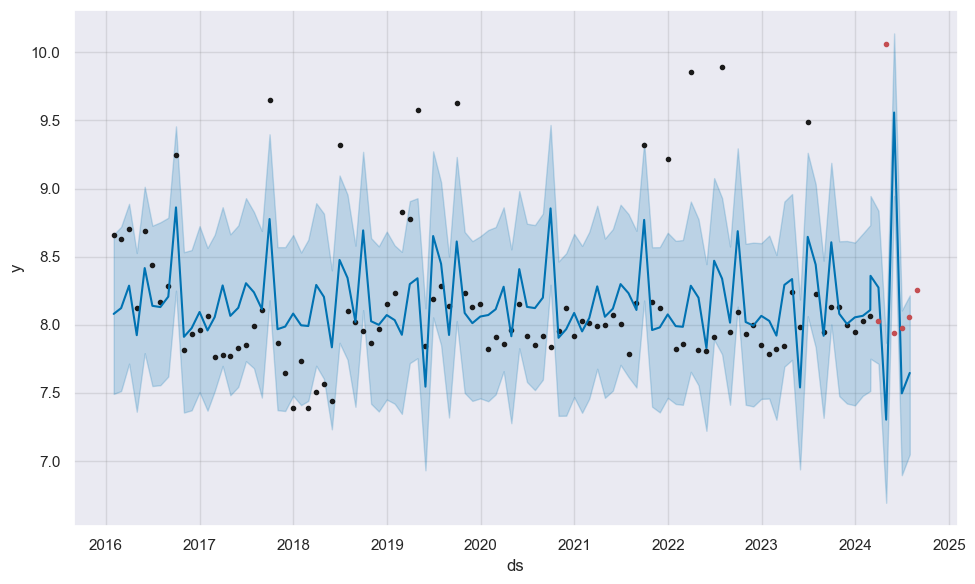

In [68]:
fig = modelo.plot(forecast)
ax = fig.gca()
ax.plot(Prueba_df_p['ds'],Prueba_df_p['y'],'r.')

Figure(900x600)


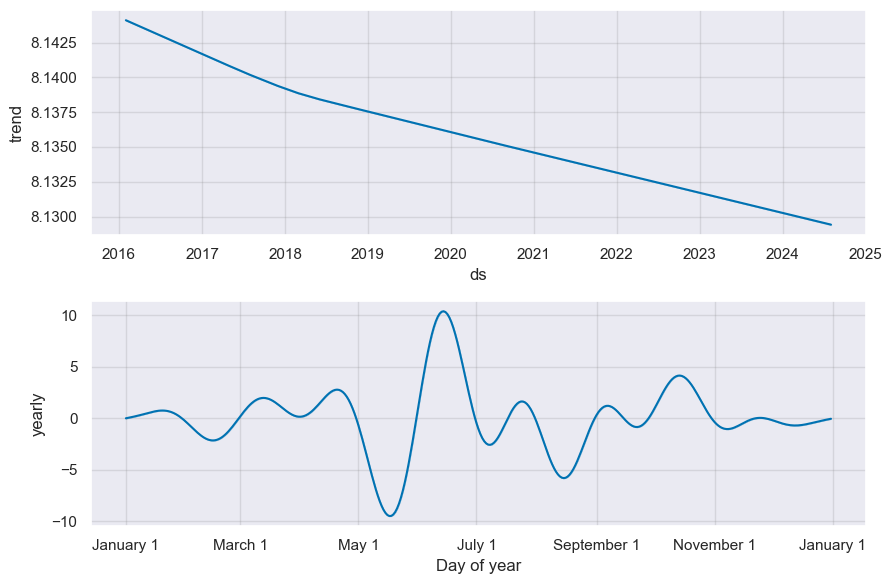

In [69]:
ph_modelo = modelo.plot_components(forecast)
print(ph_modelo)

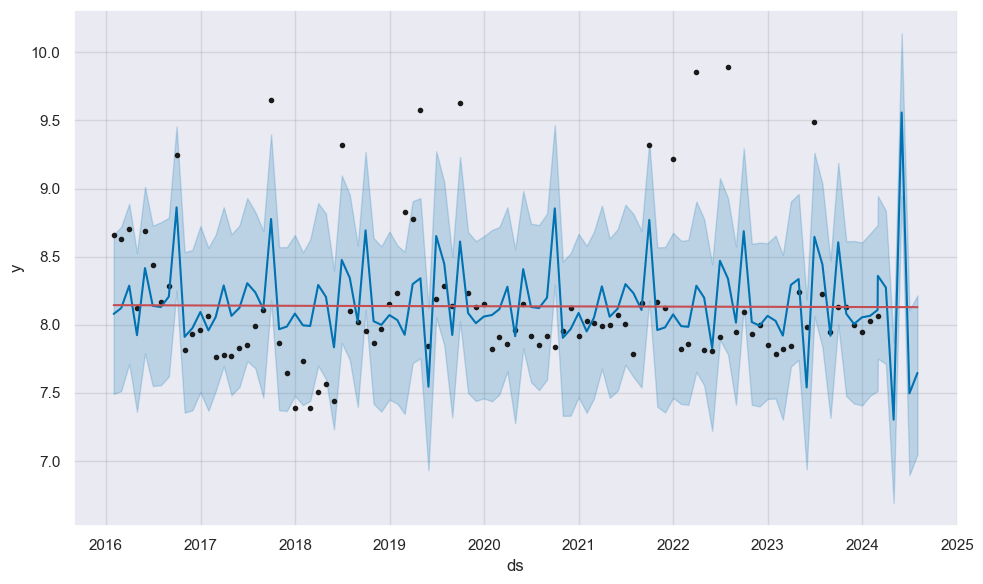

In [70]:
fig = modelo.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), modelo,forecast)

In [71]:
df_p_cv = cross_validation(modelo, initial='720 days',period='180 days',horizon='365 days')
df_p_cv

prophet    INFO  Making 11 forecasts with cutoffs between 2018-03-27 00:00:00 and 2023-03-01 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

prophet    INFO  n_changepoints greater than number of observations. Using 19.
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/6hxkvaqc.json
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/_x547u9o.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81998', 'data', 'file=/tmp/tmppwm7w2vi/6hxkvaqc.json', 'init=/tmp/tmppwm7w2vi/_x547u9o.json', 'output', 'file=/tmp/tmppwm7w2vi/prophet_model2x761ki8/prophet_model-20241129222120.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:21:20 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
22:21:21 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing
prophet    INFO  n_changepoints greater than number of observations. Using 24.
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/ia0pbsu

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-31,7.544780,7.483077,7.605725,7.505785,2018-03-27
1,2018-04-30,7.820995,7.760214,7.891254,7.565072,2018-03-27
2,2018-05-31,7.062213,6.990721,7.142778,7.440799,2018-03-27
3,2018-06-30,7.067467,6.967551,7.167056,9.321031,2018-03-27
4,2018-07-31,7.352230,7.229187,7.482196,8.101899,2018-03-27
...,...,...,...,...,...,...
127,2023-10-31,8.026505,7.442960,8.617437,8.127657,2023-03-01
128,2023-11-30,7.960056,7.401859,8.621242,7.996787,2023-03-01
129,2023-12-31,8.056444,7.459157,8.656633,7.947172,2023-03-01
130,2024-01-31,8.043465,7.447803,8.639978,8.030218,2023-03-01


In [124]:
df_per = performance_metrics(df_p_cv)
df_per.tail(6)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
114,353 days,0.718937,0.847901,0.594788,0.069104,0.048895,0.071818,0.538462
115,354 days,0.685193,0.827764,0.551719,0.063762,0.044716,0.066727,0.615385
116,358 days,0.675967,0.822172,0.527597,0.060656,0.036181,0.063697,0.615385
117,359 days,0.675542,0.821914,0.526388,0.060502,0.036181,0.063546,0.615385
118,363 days,0.377041,0.614036,0.381715,0.046047,0.033842,0.047388,0.692308
119,365 days,0.372488,0.610318,0.369230,0.044409,0.021436,0.045787,0.692308


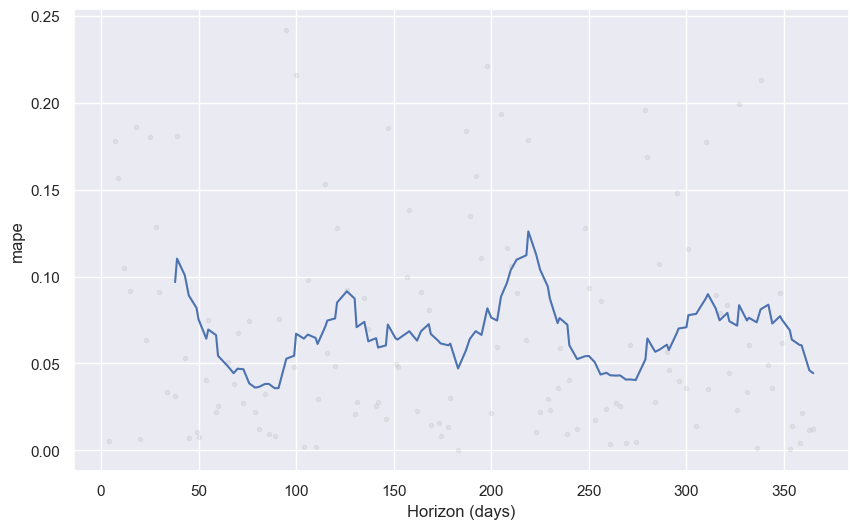

In [74]:
fig = plot_cross_validation_metric(df_p_cv, metric='mape')

In [112]:
df_p

,ds,y
0,2016-01-31,8.659167
1,2016-02-29,8.629858
2,2016-03-31,8.705258
3,2016-04-30,8.122614
4,2016-05-31,8.688586
...,...,...
99,2024-04-30,10.058470
100,2024-05-31,7.936171
101,2024-06-30,7.979451
102,2024-07-31,8.055558


prophet    INFO  Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
prophet    INFO  Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/qbb44fwx.json
cmdstanpy  DEBUG input tempfile: /tmp/tmppwm7w2vi/ybs1z0ia.json
cmdstanpy  DEBUG idx 0
cmdstanpy  DEBUG running CmdStan, num_threads: None
cmdstanpy  DEBUG CmdStan args: ['/home/danielcardenas/.local/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59955', 'data', 'file=/tmp/tmppwm7w2vi/qbb44fwx.json', 'init=/tmp/tmppwm7w2vi/ybs1z0ia.json', 'output', 'file=/tmp/tmppwm7w2vi/prophet_modelcpftgq49/prophet_model-20241129235825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:58:25 - cmdstanpy - INFO - Chain [1] start processing
cmdstanpy  INFO  Chain [1] start processing
23:58:26 - cmdstanpy - INFO - Chain [1] done processing
cmdstanpy  INFO  Chain [1] done processing


            ds  yhat_original  yhat_lower_original  yhat_upper_original
0   2016-01-31   1.201143e+08         2.969246e+07         4.533617e+08
1   2016-02-29   1.139127e+08         2.627482e+07         4.629256e+08
2   2016-03-31   1.436142e+08         3.395851e+07         5.985424e+08
3   2016-04-30   2.600379e+08         5.858123e+07         1.058335e+09
4   2016-05-31   1.671757e+08         3.958293e+07         6.194239e+08
..         ...            ...                  ...                  ...
105 2024-10-01   1.551794e+09         4.079621e+08         5.894531e+09
106 2024-11-01   8.018793e+07         2.031120e+07         3.517953e+08
107 2024-12-01   1.082797e+08         2.736072e+07         4.033855e+08
108 2025-01-01   1.426580e+08         3.904708e+07         6.221897e+08
109 2025-02-01   5.709582e+07         1.450102e+07         2.248800e+08

[110 rows x 4 columns]


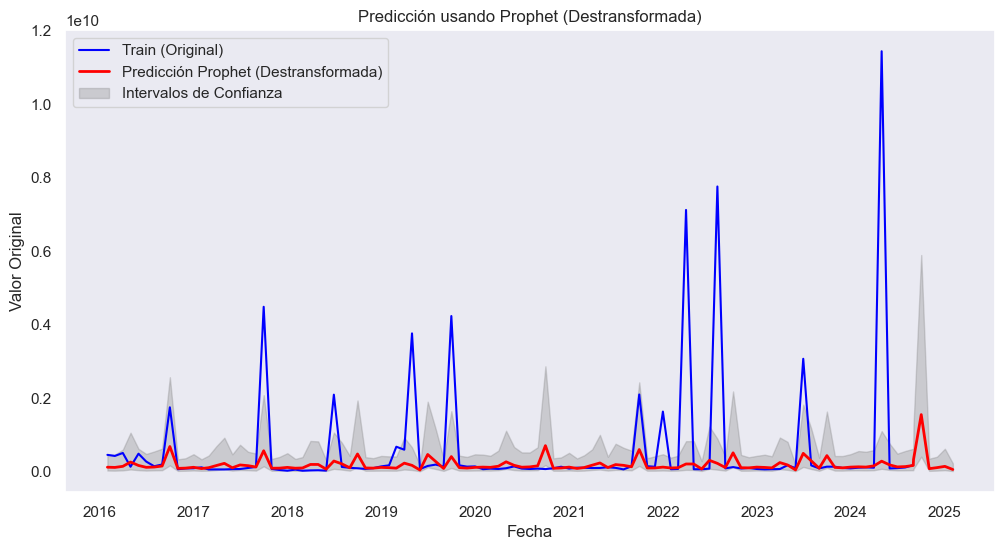

In [114]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ajustar el modelo Prophet con crecimiento lineal (ya que la serie está transformada)
modelo = Prophet(growth='linear', yearly_seasonality=True)
modelo.fit(df_p)  # Asegúrate de que df_p tiene las columnas 'ds' y 'y' ya transformadas

# Generar las fechas futuras para las predicciones
future = modelo.make_future_dataframe(periods=6, freq='MS')  # 'MS' para frecuencia mensual

# Realizar las predicciones
forecast = modelo.predict(future)

# Deshacer la transformación logarítmica en las predicciones
forecast['yhat_original'] = 10 ** forecast['yhat']
forecast['yhat_lower_original'] = 10 ** forecast['yhat_lower']
forecast['yhat_upper_original'] = 10 ** forecast['yhat_upper']

# Mostrar las predicciones destransformadas
print(forecast[['ds', 'yhat_original', 'yhat_lower_original', 'yhat_upper_original']])

# Graficar las predicciones de Prophet con los datos destransformados
plt.figure(figsize=(12, 6))

# Serie original (entrenamiento)
plt.plot(df_p['ds'], 10 ** df_p['y'], label="Train (Original)", color='blue')

# Predicciones destransformadas
plt.plot(forecast['ds'], forecast['yhat_original'], label="Predicción Prophet (Destransformada)", color='red', linewidth=2)
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower_original'], 
    forecast['yhat_upper_original'], 
    color='gray', alpha=0.3, label='Intervalos de Confianza'
)

plt.title("Predicción usando Prophet (Destransformada)")
plt.xlabel("Fecha")
plt.ylabel("Valor Original")
plt.legend(loc='upper left')
plt.grid()
plt.show()



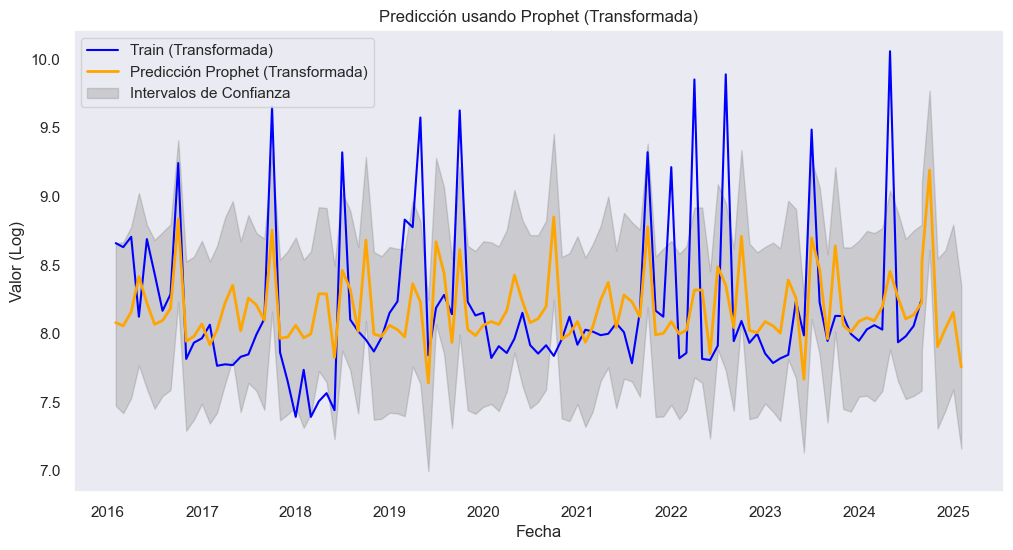

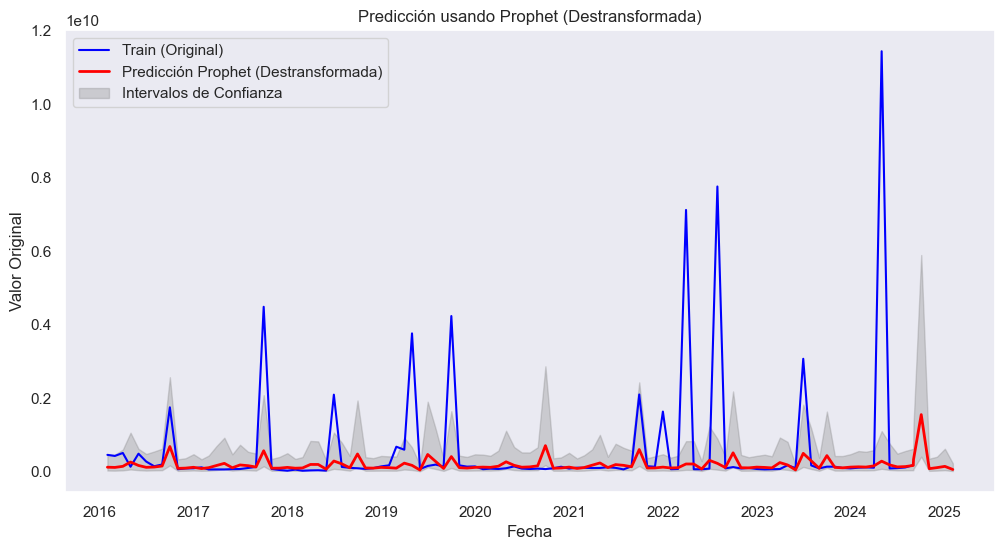

In [115]:
# Graficar serie transformada (log) y predicciones en escala transformada
plt.figure(figsize=(12, 6))

# Serie transformada (entrenamiento)
plt.plot(df_p['ds'], df_p['y'], label="Train (Transformada)", color='blue')

# Predicciones en la escala transformada
plt.plot(forecast['ds'], forecast['yhat'], label="Predicción Prophet (Transformada)", color='orange', linewidth=2)
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='gray', alpha=0.3, label='Intervalos de Confianza'
)

plt.title("Predicción usando Prophet (Transformada)")
plt.xlabel("Fecha")
plt.ylabel("Valor (Log)")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Graficar serie original (destransformada) y predicciones destransformadas
plt.figure(figsize=(12, 6))

# Serie original (destransformada)
plt.plot(df_p['ds'], 10 ** df_p['y'], label="Train (Original)", color='blue')

# Predicciones destransformadas
plt.plot(forecast['ds'], forecast['yhat_original'], label="Predicción Prophet (Destransformada)", color='red', linewidth=2)
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower_original'], 
    forecast['yhat_upper_original'], 
    color='gray', alpha=0.3, label='Intervalos de Confianza'
)

plt.title("Predicción usando Prophet (Destransformada)")
plt.xlabel("Fecha")
plt.ylabel("Valor Original")
plt.legend(loc='upper left')
plt.grid()
plt.show()


In [123]:
forecast[['ds','yhat_lower_original','yhat_upper_original']].tail(6)

,ds,yhat_lower_original,yhat_upper_original
104,2024-09-01,7.585603e+07,1.267790e+09
105,2024-10-01,4.079621e+08,5.894531e+09
106,2024-11-01,2.031120e+07,3.517953e+08
107,2024-12-01,2.736072e+07,4.033855e+08
108,2025-01-01,3.904708e+07,6.221897e+08
109,2025-02-01,1.450102e+07,2.248800e+08


In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Filtrar las predicciones para el rango de fechas del conjunto de prueba
forecast_test = forecast[forecast['ds'].isin(Prueba_df_p['ds'])]

# Calcular las métricas en la escala transformada (logarítmica)
mae_log = mean_absolute_error(Prueba_df_p['y'], forecast_test['yhat'])
mse_log = mean_squared_error(Prueba_df_p['y'], forecast_test['yhat'])
rmse_log = np.sqrt(mse_log)
mape_log = np.mean(np.abs((Prueba_df_p['y'] - forecast_test['yhat']) / Prueba_df_p['y'])) * 100

print("Métricas (escala transformada - logarítmica):")
print(f"MAE: {mae_log}")
print(f"MSE: {mse_log}")
print(f"RMSE: {rmse_log}")
print(f"MAPE: {mape_log:.2f}%")

# Destransformar los valores reales y predichos para compararlos en la escala original
real_original = 10 ** Prueba_df_p['y']
pred_original = 10 ** forecast_test['yhat']

# Calcular las métricas en la escala original
mae = mean_absolute_error(real_original, pred_original)
mse = mean_squared_error(real_original, pred_original)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((real_original - pred_original) / real_original)) * 100

print("\nMétricas (escala original):")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")


Métricas (escala transformada - logarítmica):
MAE: 0.388823264322318
MSE: 0.4556653302506483
RMSE: 0.6750298735986788
MAPE: 4.18%

Métricas (escala original):
MAE: 1895046761.7848384
MSE: 2.074945049077486e+19
RMSE: 4555156472.699358
MAPE: 52.76%
